In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/Data Nilai - after cleaning - ADA + SE, ADD COND.csv")
df

,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Tepat/tidak tepat/tidak lulus,Algorithm and Programming Score,Algorithm lulus/tidak lulus,Data Structures Score,Data struct lulus/tidak lulus,SE score,ADA score,Unnamed: 10,Unnamed: 11
0,220001,3.65,8,Tepat waktu,88.0,Lulus,86.0,Lulus,91.0,80.0,NaN,NaN
1,220002,2.21,10,Tidak tepat waktu,65.0,Lulus,62.0,Tidak lulus,80.0,74.0,NaN,NaN
2,220003,3.89,8,Tepat waktu,91.0,Lulus,90.0,Lulus,92.0,90.0,NaN,NaN
3,220004,3.37,8,Tepat waktu,68.0,Lulus,88.0,Lulus,90.0,67.0,NaN,NaN
4,220005,3.37,8,Tepat waktu,92.0,Lulus,89.0,Lulus,90.0,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,221168,3.79,8,Tepat waktu,65.0,Lulus,91.0,Lulus,90.0,93.0,NaN,NaN
1115,221169,2.27,6,Tidak lulus,24.0,Tidak lulus,28.0,Tidak lulus,12.0,42.0,NaN,NaN
1116,221170,2.64,9,Tidak tepat waktu,75.0,Lulus,63.0,Tidak lulus,89.0,84.0,NaN,NaN
1117,221171,3.70,8,Tepat waktu,81.0,Lulus,83.0,Lulus,99.0,85.0,NaN,NaN


In [ ]:
df.info()
df.drop("Unnamed: 11", axis = 'columns')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           1119 non-null   int64  
 1   IPK                                                          1119 non-null   float64
 2   Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)  1119 non-null   int64  
 3   Tepat/tidak tepat/tidak lulus                                1119 non-null   object 
 4   Algorithm and Programming Score                              1119 non-null   float64
 5   Algorithm lulus/tidak lulus                                  1119 non-null   object 
 6   Data Structures Score                                        1119 non-null   float64
 7   Data struct lulus/tidak lulus                                1119 non-null   o

,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Tepat/tidak tepat/tidak lulus,Algorithm and Programming Score,Algorithm lulus/tidak lulus,Data Structures Score,Data struct lulus/tidak lulus,SE score,ADA score,Unnamed: 10,Unnamed: 11
0,220001,3.65,8,Tepat waktu,88.0,Lulus,86.0,Lulus,91.0,80.0,NaN,NaN
1,220002,2.21,10,Tidak tepat waktu,65.0,Lulus,62.0,Tidak lulus,80.0,74.0,NaN,NaN
2,220003,3.89,8,Tepat waktu,91.0,Lulus,90.0,Lulus,92.0,90.0,NaN,NaN
3,220004,3.37,8,Tepat waktu,68.0,Lulus,88.0,Lulus,90.0,67.0,NaN,NaN
4,220005,3.37,8,Tepat waktu,92.0,Lulus,89.0,Lulus,90.0,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,221168,3.79,8,Tepat waktu,65.0,Lulus,91.0,Lulus,90.0,93.0,NaN,NaN
1115,221169,2.27,6,Tidak lulus,24.0,Tidak lulus,28.0,Tidak lulus,12.0,42.0,NaN,NaN
1116,221170,2.64,9,Tidak tepat waktu,75.0,Lulus,63.0,Tidak lulus,89.0,84.0,NaN,NaN
1117,221171,3.70,8,Tepat waktu,81.0,Lulus,83.0,Lulus,99.0,85.0,NaN,NaN


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           1119 non-null   int64  
 1   IPK                                                          1119 non-null   float64
 2   Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)  1119 non-null   int64  
 3   Tepat/tidak tepat/tidak lulus                                1119 non-null   object 
 4   Algorithm and Programming Score                              1119 non-null   float64
 5   Algorithm lulus/tidak lulus                                  1119 non-null   object 
 6   Data Structures Score                                        1119 non-null   float64
 7   Data struct lulus/tidak lulus                                1119 non-null   o

,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Tepat/tidak tepat/tidak lulus,Algorithm and Programming Score,Algorithm lulus/tidak lulus,Data Structures Score,Data struct lulus/tidak lulus,SE score,ADA score,Unnamed: 10,Unnamed: 11
0,220001,3.65,8,Tepat waktu,88.0,Lulus,86.0,Lulus,91.0,80.0,NaN,NaN
1,220002,2.21,10,Tidak tepat waktu,65.0,Lulus,62.0,Tidak lulus,80.0,74.0,NaN,NaN
2,220003,3.89,8,Tepat waktu,91.0,Lulus,90.0,Lulus,92.0,90.0,NaN,NaN
3,220004,3.37,8,Tepat waktu,68.0,Lulus,88.0,Lulus,90.0,67.0,NaN,NaN
4,220005,3.37,8,Tepat waktu,92.0,Lulus,89.0,Lulus,90.0,76.0,NaN,NaN


In [ ]:
df.isna().sum()

ID                                                                0
IPK                                                               0
Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)       0
Tepat/tidak tepat/tidak lulus                                     0
Algorithm and Programming Score                                   0
Algorithm lulus/tidak lulus                                       0
Data Structures Score                                             0
Data struct lulus/tidak lulus                                     0
SE score                                                          0
ADA score                                                         0
Unnamed: 10                                                    1119
Unnamed: 11                                                    1119
dtype: int64

In [ ]:
df = df[df['Tepat/tidak tepat/tidak lulus'] != "Tidak lulus"]
df = df[df['Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)'] > 7]

In [ ]:
df = df.drop(["Unnamed: 10", "Unnamed: 11"],axis = 1)

In [ ]:
df.describe()

,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Algorithm and Programming Score,Data Structures Score,SE score,ADA score
count,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,220571.200371,3.311800,8.685529,77.036178,78.883117,87.757885,79.573284
std,338.691763,0.391843,0.746639,11.547150,14.370133,9.453783,12.654237
min,220001.000000,1.780000,8.000000,19.000000,0.000000,0.000000,18.000000
25%,220276.250000,3.090000,8.000000,68.000000,72.000000,85.000000,72.000000
50%,220563.500000,3.380000,9.000000,76.000000,81.000000,90.000000,82.000000
75%,220860.750000,3.610000,9.000000,85.000000,90.000000,92.750000,90.000000
max,221171.000000,3.960000,10.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
df.head()

,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Tepat/tidak tepat/tidak lulus,Algorithm and Programming Score,Algorithm lulus/tidak lulus,Data Structures Score,Data struct lulus/tidak lulus,SE score,ADA score
0,220001,3.65,8,Tepat waktu,88.0,Lulus,86.0,Lulus,91.0,80.0
1,220002,2.21,10,Tidak tepat waktu,65.0,Lulus,62.0,Tidak lulus,80.0,74.0
2,220003,3.89,8,Tepat waktu,91.0,Lulus,90.0,Lulus,92.0,90.0
3,220004,3.37,8,Tepat waktu,68.0,Lulus,88.0,Lulus,90.0,67.0
4,220005,3.37,8,Tepat waktu,92.0,Lulus,89.0,Lulus,90.0,76.0


In [ ]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,IPK,Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),Algorithm and Programming Score,Data Structures Score,SE score,ADA score
ID,1.000000,-0.262335,0.205733,-0.124344,-0.211515,-0.112293,-0.155705
IPK,-0.262335,1.000000,-0.670278,0.508517,0.705311,0.446200,0.510401
Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester),0.205733,-0.670278,1.000000,-0.272657,-0.541270,-0.329789,-0.342549
Algorithm and Programming Score,-0.124344,0.508517,-0.272657,1.000000,0.436428,0.146283,0.250735
Data Structures Score,-0.211515,0.705311,-0.541270,0.436428,1.000000,0.280690,0.370105
SE score,-0.112293,0.446200,-0.329789,0.146283,0.280690,1.000000,0.239640
ADA score,-0.155705,0.510401,-0.342549,0.250735,0.370105,0.239640,1.000000


[Text(0, 0, '523'), Text(0, 0, '555')]

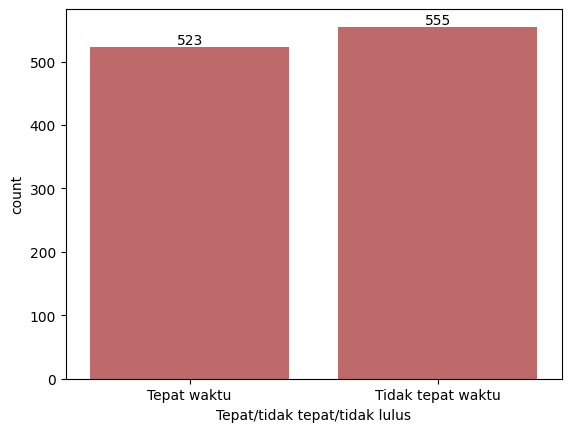

In [ ]:
import seaborn as sns
cols= ["#CD5C5C"]
ax = sns.countplot(x= df["Tepat/tidak tepat/tidak lulus"], palette= cols)

ax.bar_label(ax.containers[0])

[Text(0, 0, '523'), Text(0, 0, '371'), Text(0, 0, '184')]

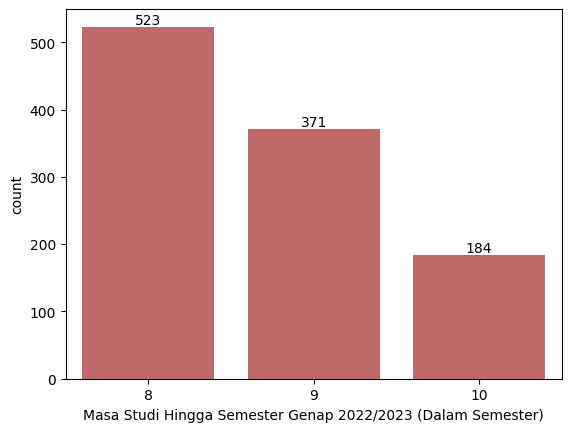

In [ ]:
X = df.drop(["ID","Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)", "Tepat/tidak tepat/tidak lulus", "Algorithm lulus/tidak lulus", "Data struct lulus/tidak lulus"],axis=1)
y = df["Masa Studi Hingga Semester Genap 2022/2023 (Dalam Semester)"]
y
cols= ["#CD5C5C"]
ax = sns.countplot(x= y, palette= cols)

ax.bar_label(ax.containers[0])

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
IPK,1078.0,-4.218436e-16,1.000464,-3.911028,-0.566304,0.174131,0.761373,1.655001
Algorithm and Programming Score,1078.0,4.877566e-16,1.000464,-5.028350,-0.782909,-0.089776,0.689999,1.989624
Data Structures Score,1078.0,-3.954783e-17,1.000464,-5.491928,-0.479210,0.147380,0.773969,1.470180
SE score,1078.0,6.591306e-17,1.000464,-9.287141,-0.291858,0.237276,0.528300,1.295545
ADA score,1078.0,5.009392e-16,1.000464,-4.868082,-0.598756,0.191860,0.824353,1.614969


In [ ]:
#ga pake
from sklearn.decomposition import PCA
pca = PCA(1)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca,columns = ["PC1"])
X_pca

,PC1
0,-1.242518
1,3.037101
2,-2.182769
3,0.232959
4,-0.922924
...,...
1073,-0.821295
1074,3.498712
1075,-1.193510
1076,1.401537


In [ ]:
#new_X = X_scaled.drop(['SE score', 'ADA score'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,IPK,Algorithm and Programming Score,Data Structures Score,SE score,ADA score
529,3.56,70.0,80.0,97.0,92.0
301,3.56,83.0,86.0,91.0,92.0
111,3.68,82.0,86.0,94.0,94.0
939,3.86,87.0,90.0,98.0,94.0
938,3.55,84.0,90.0,97.0,74.0
...,...,...,...,...,...
337,3.17,87.0,80.0,91.0,67.0
474,3.85,77.0,85.0,96.0,85.0
123,3.53,73.0,75.0,96.0,65.0
1082,2.42,70.0,58.0,95.0,90.0


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_train= s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=col_names)
X_test = pd.DataFrame(X_test, columns=col_names)

<Axes: >

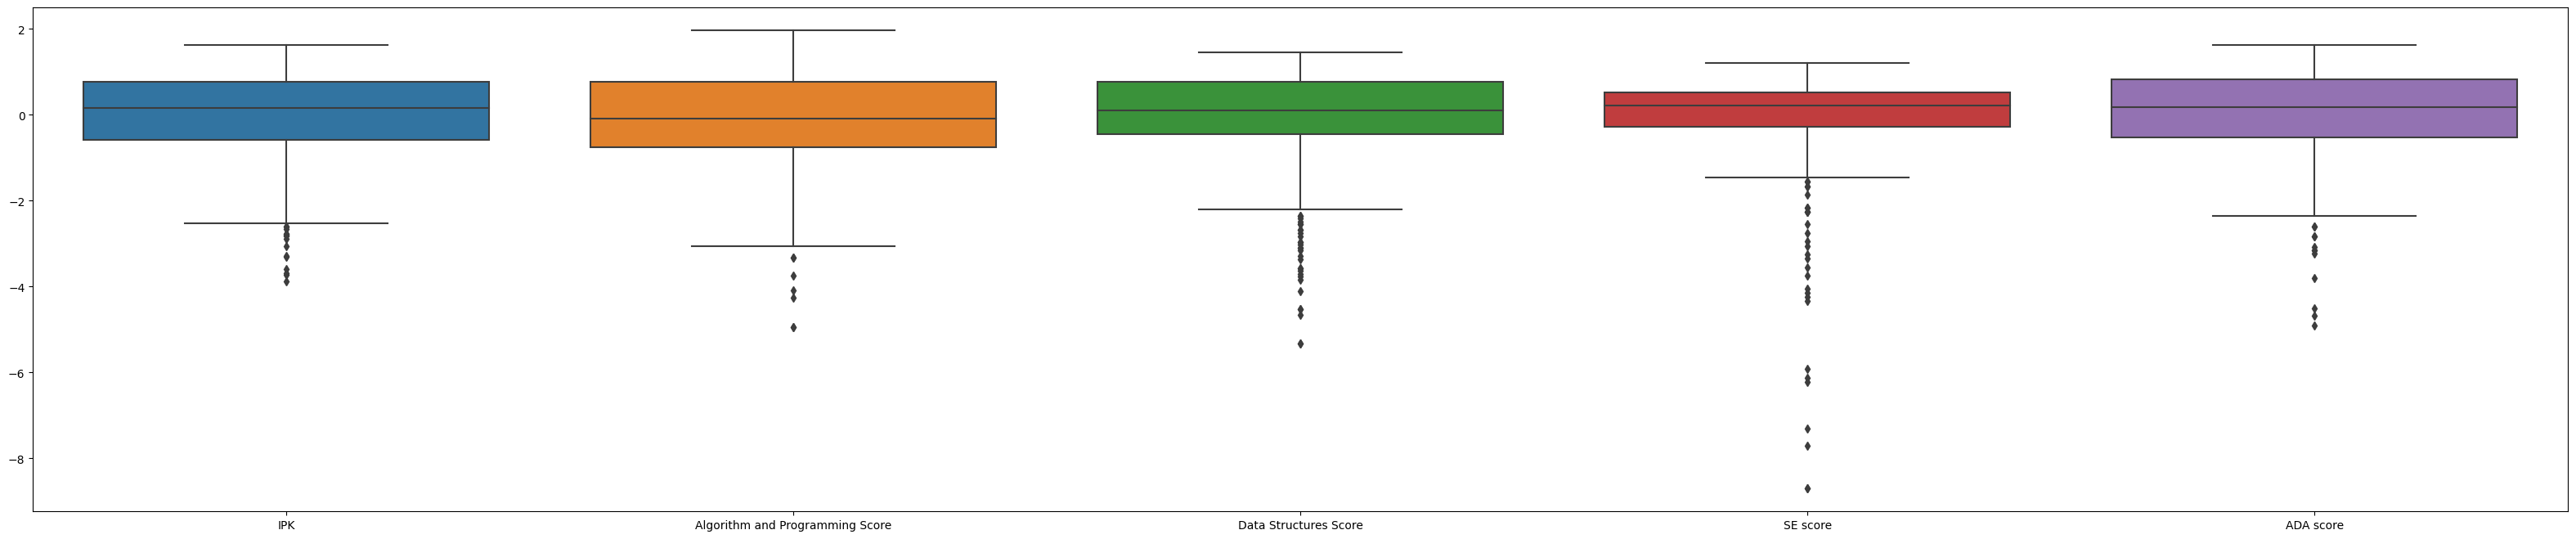

In [ ]:
plt.figure(figsize=(40,8))
sns.boxplot(data=X_train)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score
# for i in range (90,101):
#   print("")
#   for j in range(90,101):
#     nn = MLPClassifier(hidden_layer_sizes=(i,j), activation='logistic', solver='adam', max_iter=1500,learning_rate_init = 0.01, warm_start = True, shuffle = True)
#     nn.fit(X_train,y_train)
#     y_pred = nn.predict(X_test)
#     print(f"first layer: {i} - second layer: {j} - accuracy: ",round(accuracy_score(y_test,y_pred),2))
#     #print(round(accuracy_score(y_test,y_pred),2))



In [ ]:
from sklearn.metrics import classification_report
from sklearn import svm
nn = MLPClassifier(hidden_layer_sizes=(100,50), activation = 'logistic',solver='adam', max_iter=1500,learning_rate_init = 0.01, shuffle = True)
svv = svm.SVC(kernel = 'sigmoid', C = 2)
nn.fit(X_train,y_train)
svv.fit(X_train,y_train)
y_pred = nn.predict(X_test)
y_pred2 = svv.predict(X_test)
print(X_train.shape)
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred2))


(808, 5)
              precision    recall  f1-score   support

           8       0.74      0.83      0.78       139
           9       0.62      0.51      0.56        91
          10       0.74      0.72      0.73        40

    accuracy                           0.71       270
   macro avg       0.70      0.69      0.69       270
weighted avg       0.70      0.71      0.70       270

              precision    recall  f1-score   support

           8       0.63      0.77      0.69       139
           9       0.42      0.22      0.29        91
          10       0.25      0.33      0.29        40

    accuracy                           0.52       270
   macro avg       0.43      0.44      0.42       270
weighted avg       0.50      0.52      0.49       270



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining looping history variables
counter = 0
hist_train = []
hist_valid = []
# loop over the folds
for i in range(2,21):

  kf = KFold(n_splits=i)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  col_names = list(X.columns)
  s_scaler = preprocessing.StandardScaler()
  X_train= s_scaler.fit_transform(X_train)
  X_test = s_scaler.transform(X_test)
  X_train = pd.DataFrame(X_train, columns=col_names)
  X_test = pd.DataFrame(X_test, columns=col_names)
  for train_index, valid_index in kf.split(X_train):

    # fold counting
    counter+=1
    # data splitting
    Xis_train, Xis_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    yis_train, yis_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Create a NN
    nn = MLPClassifier(hidden_layer_sizes=(100,100), activation = 'logistic',solver='adam', max_iter=1500,learning_rate_init = 0.05, shuffle = True,warm_start = True)
    nn.fit(Xis_train,yis_train)


  y_pred = nn.predict(X_test)
  print(f"k-fold {i} accuracy: ",round(accuracy_score(y_test,y_pred),2))


      # Evaluate the model's performance on the training data
      # accuracy = nn.score(X_train, y_train)
      # hist_train.append(accuracy)
      # print(f"Fold-{counter} Train Acc: {accuracy}")

      # Evaluate the model's performance on the validation data
      # accuracy = nn.score(X_valid, y_valid)
      # hist_valid.append(accuracy)
      # print(f"Fold-{counter} Valid Acc: {accuracy}\n")
      # print(classification_report(y_test, nn.predict(X_test)))

      # averaging the training data
      # print(f"Average Train Acc: {np.mean(hist_train)}")
      # # averaging the validation data
      # print(f"Average Valid Acc: {np.mean(hist_valid)}")

      # Evaluate the model's performance on the testing data

k-fold 2 accuracy:  0.61
k-fold 3 accuracy:  0.6
k-fold 4 accuracy:  0.6
k-fold 5 accuracy:  0.62
k-fold 6 accuracy:  0.58
k-fold 7 accuracy:  0.56
k-fold 8 accuracy:  0.61
k-fold 9 accuracy:  0.64
k-fold 10 accuracy:  0.57
k-fold 11 accuracy:  0.6
k-fold 12 accuracy:  0.62
k-fold 13 accuracy:  0.64
k-fold 14 accuracy:  0.63
k-fold 15 accuracy:  0.72
k-fold 16 accuracy:  0.72
k-fold 17 accuracy:  0.64
k-fold 18 accuracy:  0.73
k-fold 19 accuracy:  0.71
k-fold 20 accuracy:  0.7


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           8       0.71      0.84      0.77       109
           9       0.64      0.49      0.55        74
          10       0.74      0.70      0.72        33

    accuracy                           0.70       216
   macro avg       0.70      0.68      0.68       216
weighted avg       0.69      0.70      0.69       216



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3 )
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           8       0.71      0.86      0.78       109
           9       0.63      0.50      0.56        74
          10       0.83      0.61      0.70        33

    accuracy                           0.70       216
   macro avg       0.72      0.66      0.68       216
weighted avg       0.70      0.70      0.69       216

